### Exploratory Data Analysis: Breast Cancer

# Business Problem

### In this study, we aim to perform exploratory data analysis using the breast cancer dataset

# Dataset Story

This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

# Import Necessary Libraries

In [31]:
#Libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#Settings
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format",lambda x: "%3.f" %x)

# Import Dataset

In [34]:
def load_dataset(path):
    df = pd.read_csv(path)
    return df

# General Information About to Dataset

In [37]:
def check_df(dataframe, head=5):
    print(20*"#", "HEAD", 20*"#")
    print(dataframe.head(head))
    print(20*"#", "TAIL", 20*"#")
    print(dataframe.tail(head))
    print(20*"#", "SHAPE", 20*"#")
    print(dataframe.shape)
    print(20*"#", "TYPES", 20*"#")
    print(dataframe.dtypes)
    print(20*"#", "NA", 20*"#")
    print(dataframe.isnull().sum())
    print(20*"#", "QUARTILES", 20*"#")
    print(dataframe.describe([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T)

# Analysis of Categorical and Numerical Variables

In [40]:
def grab_col_names(dataframe, cat_th=10, car_th=20, report=False):
    # category
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in  ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    # numerical
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    # report
    if report:
        print(f"Observation: {dataframe.shape[0]}")
        print(f"Variables: {dataframe.shape[1]}")
        print(f"Categrical Columns: {len(cat_cols)}")
        print(f"Numerical Columns: {len(num_cols)}")
        print(f"Categorical But Cardinality: {len(cat_but_car)}")
        print(f"Numerical But Categorical: {len(num_but_cat)}")
    return cat_cols, num_but_cat, cat_but_car, num_cols

In [42]:
def cat_summary(dataframe, col_name, plot=False):
    print(20*"#", col_name, 20*"#")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [44]:
def cat_summary_df(dataframe):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    for col in cat_cols:
        if dataframe[col].dtypes == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

In [46]:
def num_summary(dataframe, col_name, plot=False):
    print(20*"#", col_name, 20*"#")
    quantiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.ylabel(col_name)
        plt.show()

In [48]:
def num_summary_df(dataframe):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

In [50]:
def plot_num_summary(dataframe):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    num_plots = len(num_cols)
    rows = math.ceil(num_plots/2)
    cols = 2 if num_plots > 1 else 1
    plt.figure(figsize=(10*cols, 4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows, cols, index+1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

# Target Analysis

In [53]:
def target_summary_with_num(dataframe,target,numerical_col):
    print(20*"#", target,"---->",numerical_col, 20*"#")
    print(dataframe.groupby(target)[numerical_col].mean())

In [72]:
def target_summary_with_num_df(dataframe,target):
    cat_cols, num_but_cat,cat_but_car,num_cols = grab_col_names(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe,"survived",col)

In [57]:
def target_summary_with_num_cat(dataframe,target,categorical_col):
    print(20*"#", target,"---->",categorical_col, 20*"#")
    print(dataframe.groupby(categorical_col)[target].mean())

In [59]:
def target_summary_with_cat_df(dataframe,target):
    cat_cols, num_but_cat,cat_but_car,num_cols = grab_col_names(dataframe)
    for col in cat_cols:
        target_summary_with_num_cat(dataframe,target,col)

# Correlation Analysis

In [64]:
def high_correlated_cols(dataframe,corr_th=0.9,remove=False,plot=False):
    num_cols = [col for col in dataframe.columns if str(df[col].dtypes) in ["uint8", "int64", "float64"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>corr_th)]
    if drop_list == []:
        print(20*"#","After correlation analysis, you do not need to remove variables",20*"#")
    if remove:
        dataframe = dataframe.drop(drop_list,axis = 1)
    if plot:
        num_cols = [col for col in dataframe.columns if str(df[col].dtypes) in ["uint8", "int64", "float64"]]
        sns.set(rc={'figure.figsize':(6,4)})
        sns.heatmap(dataframe[num_cols].corr(),cmap = "RdBu",annot = True,fmt = ".1f")
        plt.show()
    return drop_list

# Pipeline

In [68]:
def main(path_dataset,target,corr_th=0.9):
    # import dataset
    df = load_dataset(path_dataset)
    print(20*"#","General Information About to Dataset",20*"#")
    check_df(df)
    print(20*"#","Analysis of Categorical and Numerical Variables",20*"#")
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(df,report=True)
    cat_summary_df(df)
    num_summary_df(df)
    if len(num_cols) > 1:
        print(20*"#","Target Analysis - Numerical",20*"#")
        target_summary_with_num_df(df,target)
    
    print(20*"#","Correlation Analysis",20*"#")
    drop_list = high_correlated_cols(df,corr_th=corr_th,remove=True,plot=True)
    print(20*"#","Plot All Numerical Variable",20*"#")
    plot_num_summary(df)

#################### General Information About to Dataset ####################
#################### HEAD ####################
   Age   Race Marital Status T Stage  N Stage 6th Stage              differentiate Grade   A Stage  Tumor Size Estrogen Status Progesterone Status  Regional Node Examined  Reginol Node Positive  Survival Months Status
0   68  White        Married       T1      N1       IIA      Poorly differentiated     3  Regional           4        Positive            Positive                      24                      1               60  Alive
1   50  White        Married       T2      N2      IIIA  Moderately differentiated     2  Regional          35        Positive            Positive                      14                      5               62  Alive
2   58  White       Divorced       T3      N3      IIIC  Moderately differentiated     2  Regional          63        Positive            Positive                      14                      7               75  Alive
3 

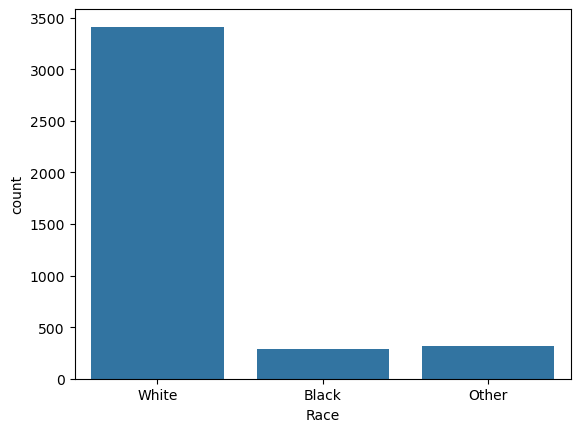

#################### Marital Status ####################
                Marital Status  Ratio
Marital Status                       
Married                   2643     66
Single                     615     15
Divorced                   486     12
Widowed                    235      6
Separated                   45      1


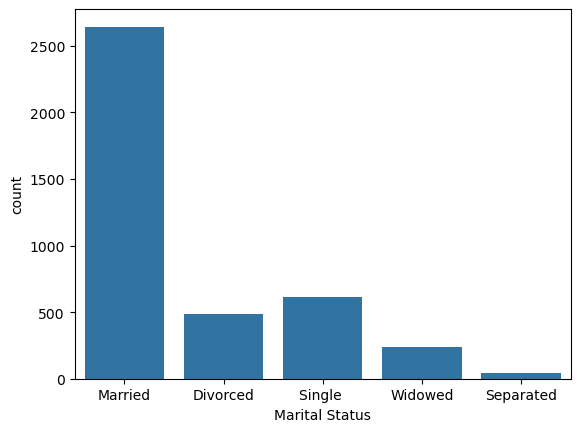

#################### T Stage  ####################
          T Stage   Ratio
T Stage                  
T2            1786     44
T1            1603     40
T3             533     13
T4             102      3


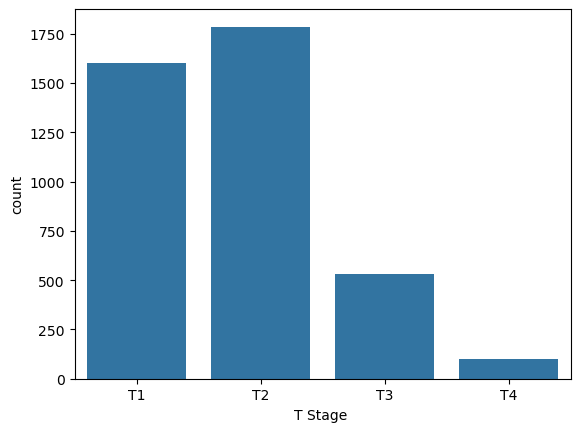

#################### N Stage ####################
         N Stage  Ratio
N Stage                
N1          2732     68
N2           820     20
N3           472     12


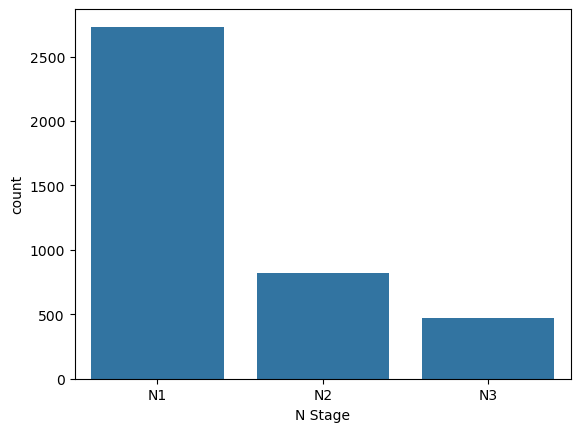

#################### 6th Stage ####################
           6th Stage  Ratio
6th Stage                  
IIA             1305     32
IIB             1130     28
IIIA            1050     26
IIIC             472     12
IIIB              67      2


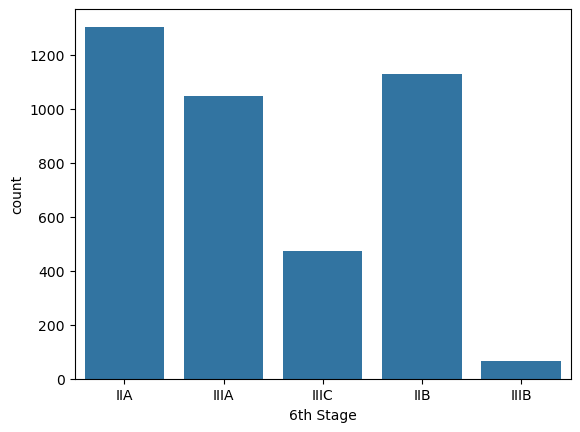

#################### differentiate ####################
                           differentiate  Ratio
differentiate                                  
Moderately differentiated           2351     58
Poorly differentiated               1111     28
Well differentiated                  543     13
Undifferentiated                      19      0


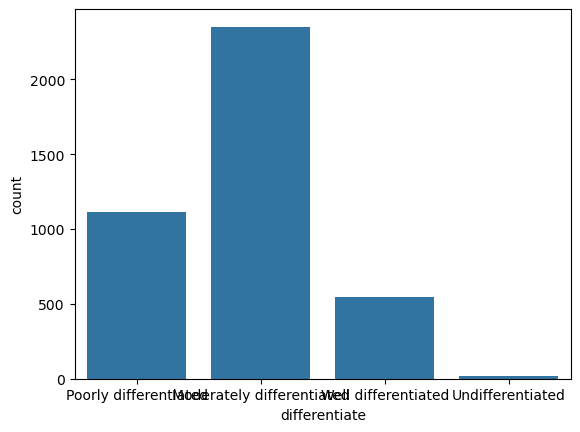

#################### Grade ####################
                       Grade  Ratio
Grade                              
2                       2351     58
3                       1111     28
1                        543     13
 anaplastic; Grade IV     19      0


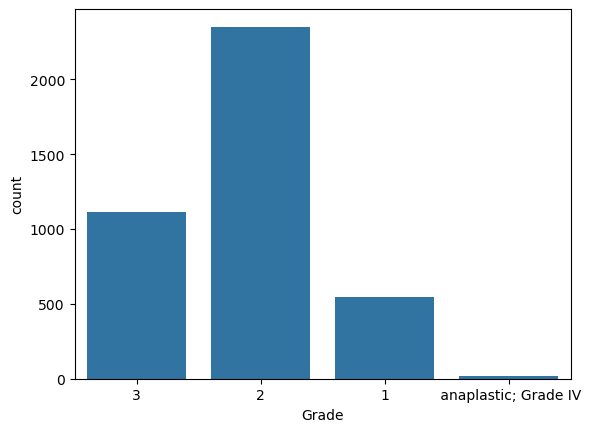

#################### A Stage ####################
          A Stage  Ratio
A Stage                 
Regional     3932     98
Distant        92      2


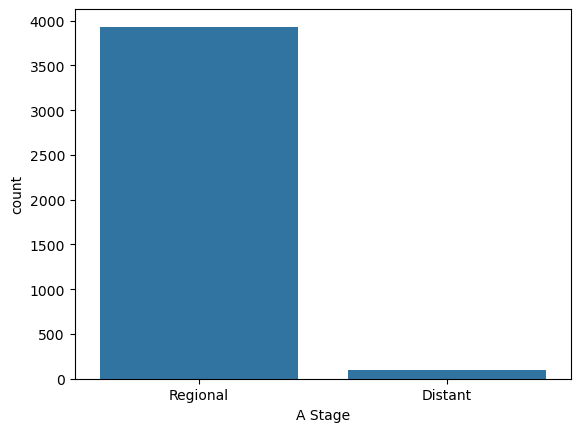

#################### Estrogen Status ####################
                 Estrogen Status  Ratio
Estrogen Status                        
Positive                    3755     93
Negative                     269      7


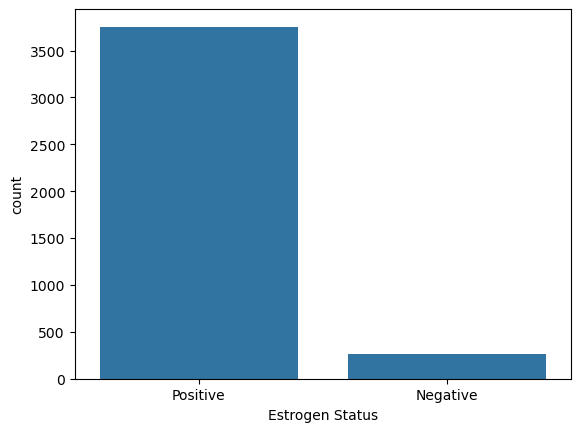

#################### Progesterone Status ####################
                     Progesterone Status  Ratio
Progesterone Status                            
Positive                            3326     83
Negative                             698     17


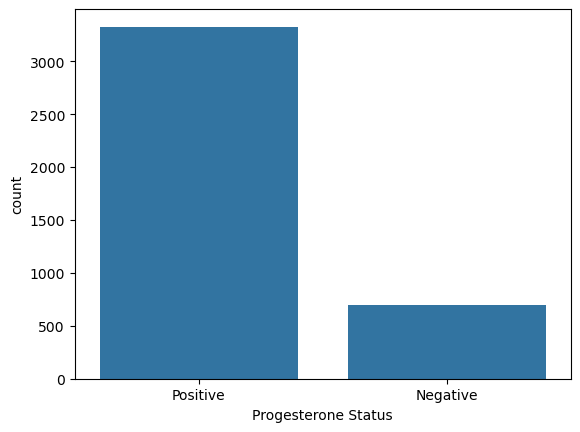

#################### Status ####################
        Status  Ratio
Status               
Alive     3408     85
Dead       616     15


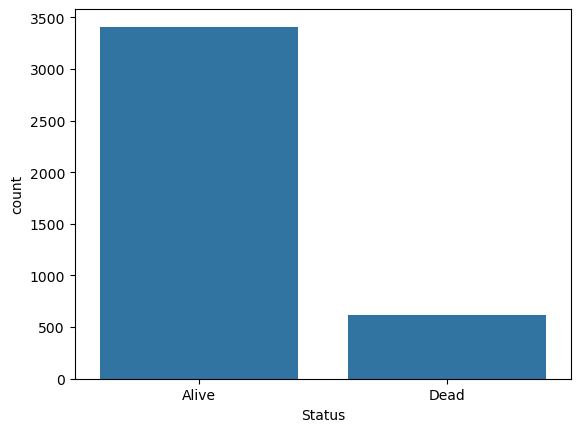

#################### Age ####################
count   4024
mean      54
std        9
min       30
1%        33
5%        39
10%       42
20%       46
30%       49
40%       51
50%       54
60%       57
70%       60
80%       63
90%       66
95%       68
99%       69
max       69
Name: Age, dtype: float64


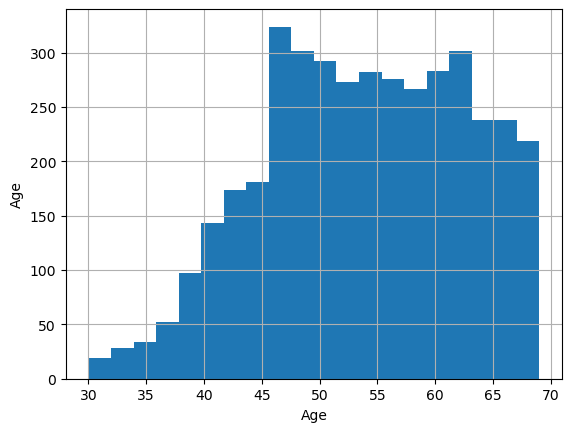

#################### Tumor Size ####################
count   4024
mean      30
std       21
min        1
1%         4
5%         9
10%       12
20%       15
30%       18
40%       20
50%       25
60%       28
70%       35
80%       43
90%       60
95%       75
99%      103
max      140
Name: Tumor Size, dtype: float64


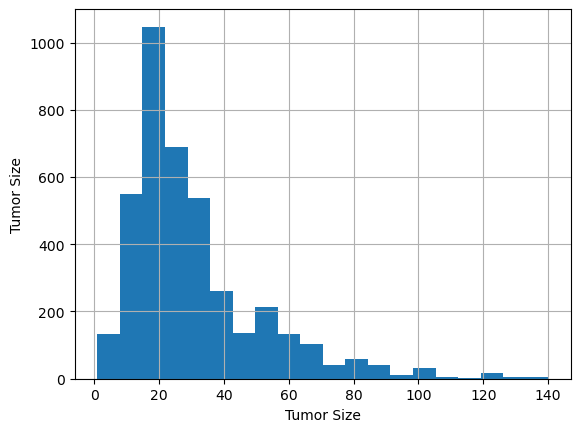

#################### Regional Node Examined ####################
count   4024
mean      14
std        8
min        1
1%         1
5%         2
10%        4
20%        8
30%       10
40%       12
50%       14
60%       16
70%       18
80%       20
90%       25
95%       28
99%       39
max       61
Name: Regional Node Examined, dtype: float64


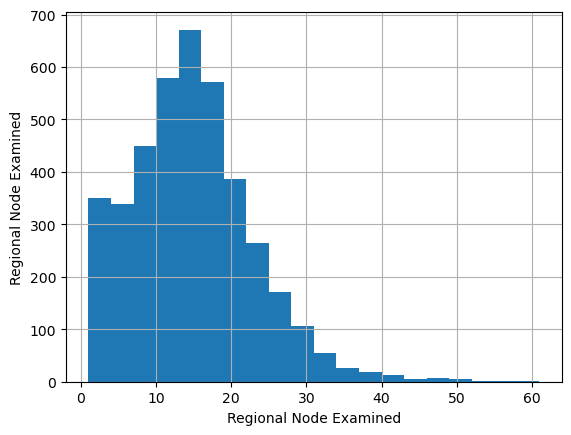

#################### Reginol Node Positive ####################
count   4024
mean       4
std        5
min        1
1%         1
5%         1
10%        1
20%        1
30%        1
40%        2
50%        2
60%        3
70%        4
80%        6
90%       10
95%       15
99%       26
max       46
Name: Reginol Node Positive, dtype: float64


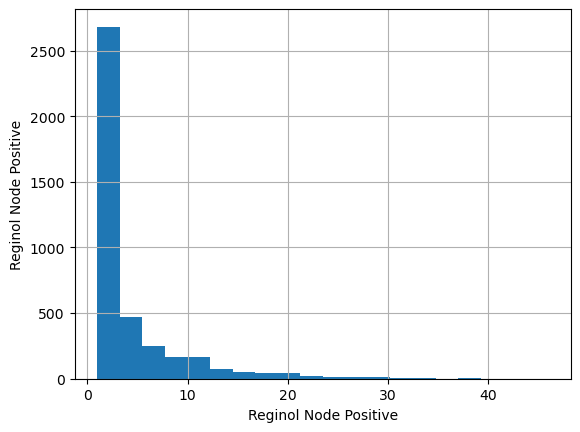

#################### Survival Months ####################
count   4024
mean      71
std       23
min        1
1%         8
5%        26
10%       44
20%       53
30%       60
40%       66
50%       73
60%       80
70%       86
80%       94
90%      100
95%      103
99%      107
max      107
Name: Survival Months, dtype: float64


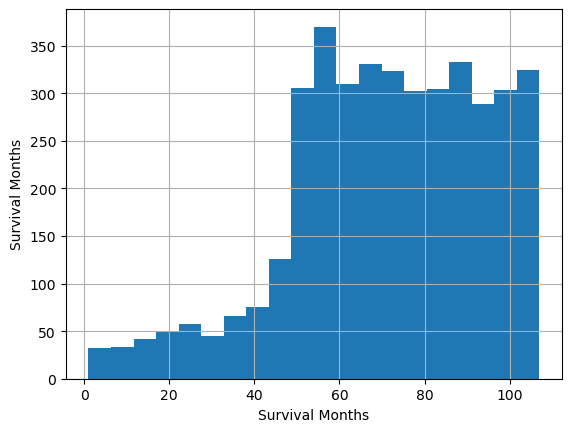

#################### Target Analysis - Numerical ####################
#################### survived ----> Age ####################


KeyError: 'survived'

In [70]:
if __name__ == "__main__":
    main("Breast_Cancer.csv","Status")
